In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import cvxpy as cp
from scipy.stats import poisson, uniform, expon, pareto, hypergeom
from scipy.optimize import minimize, fsolve, least_squares
import scipy as sc
from tqdm import tqdm
from mdptoolbox import mdp, util
import itertools
from scipy.sparse import csr_matrix, lil_matrix
from matplotlib.patches import Patch
import math
import random
import sympy as sp
from sympy.printing.latex import print_latex

In [71]:
def getCost(m_, n_, C_, k_, p_):
    support = np.arange(max(0, k_+m_-n_), min(k_,m_))
        
    outcome = (1-p_)**support*C_ + (1-(1-p_)**support) * k_*p_ / (1-(1-p)**k)
    prob_outcome = 
        
    return support

In [72]:
getCost(m_=100, n_=1000, C_=100, k_=102, p_=0.1)

[1.00000000e+00 9.00000000e-01 8.10000000e-01 7.29000000e-01
 6.56100000e-01 5.90490000e-01 5.31441000e-01 4.78296900e-01
 4.30467210e-01 3.87420489e-01 3.48678440e-01 3.13810596e-01
 2.82429536e-01 2.54186583e-01 2.28767925e-01 2.05891132e-01
 1.85302019e-01 1.66771817e-01 1.50094635e-01 1.35085172e-01
 1.21576655e-01 1.09418989e-01 9.84770902e-02 8.86293812e-02
 7.97664431e-02 7.17897988e-02 6.46108189e-02 5.81497370e-02
 5.23347633e-02 4.71012870e-02 4.23911583e-02 3.81520424e-02
 3.43368382e-02 3.09031544e-02 2.78128389e-02 2.50315550e-02
 2.25283995e-02 2.02755596e-02 1.82480036e-02 1.64232033e-02
 1.47808829e-02 1.33027946e-02 1.19725152e-02 1.07752637e-02
 9.69773730e-03 8.72796357e-03 7.85516721e-03 7.06965049e-03
 6.36268544e-03 5.72641690e-03 5.15377521e-03 4.63839769e-03
 4.17455792e-03 3.75710213e-03 3.38139191e-03 3.04325272e-03
 2.73892745e-03 2.46503470e-03 2.21853123e-03 1.99667811e-03
 1.79701030e-03 1.61730927e-03 1.45557834e-03 1.31002051e-03
 1.17901846e-03 1.061116

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [54]:
m, n, C = 100, 10000, 1000    

In [55]:
ks = np.arange(0,n+1)
ps = np.arange(0,1,0.001)

In [12]:
import numpy as np
from scipy.optimize import minimize, Bounds, LinearConstraint, NonlinearConstraint

def make_objective(m, n, C):
    """
    Returns a callable f(x) that evaluates
        max(  sum_{i=1}^m x_i + C * prod_{i=1}^m (1 - x_i),
             sum_{i=1}^n x_i + C * prod_{i=1}^n (1 - x_i) ).
    """
    def f(x):
        x = np.asarray(x)
        term_m = x[:m].sum() + C * np.prod(1 - x[:m])
        term_n = x.sum()   + C * np.prod(1 - x)
        return max(term_m, term_n)          # nondifferentiable at equality – SLSQP can still handle it
    return f

def minimize_problem(m, n, C, x0=None, randomized_restarts=10):
    """
    Solves the minimization problem for the given parameters.
    Uses SLSQP with several random restarts (because the problem is non-convex).

    Parameters
    ----------
    m, n : int        with 1 ≤ m < n
    C     : float     penalty parameter (typically “large”)
    x0    : array-like or None  – initial guess (length n)
    randomized_restarts : int   – number of extra random starts besides x0
    """
    if not (1 <= m < n):
        raise ValueError("Require 1 ≤ m < n.")

    obj = make_objective(m, n, C)

    # bounds 0 ≤ x_i ≤ 1
    bounds = Bounds(lb=np.zeros(n), ub=np.ones(n))

    # ordering constraints:  x_i - x_{i+1} ≤ 0   for i = 0 … n-2
    A = np.zeros((n - 1, n))
    for i in range(n - 1):
        A[i, i]     = 1   # x_i
        A[i, i + 1] = -1  # -x_{i+1}
    order_constraint = LinearConstraint(A, lb=-np.inf, ub=np.zeros(n - 1))

    start = np.linspace(0.0, 1.0, n)
    return minimize(
            obj,
            start,
            method="SLSQP",
            bounds=bounds,
            constraints=[order_constraint],
            options={"ftol": 1e-12, "maxiter": 1000},
        )

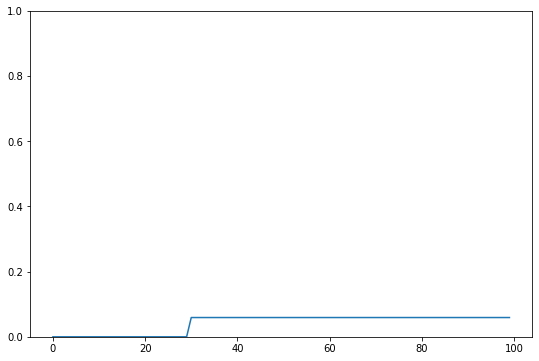

(array([4.87417139e-18, 1.25894432e-17, 7.52687562e-18, 7.02128278e-18,
        7.76602949e-18, 1.04751993e-17, 1.52563985e-17, 1.97750491e-17,
        2.50425217e-17, 2.97528339e-17, 3.45652148e-17, 3.92814780e-17,
        4.39969811e-17, 4.93621722e-17, 5.34309488e-17, 5.83780336e-17,
        6.83174207e-17, 8.41648341e-17, 1.00025846e-16, 1.15993010e-16,
        1.31557751e-16, 1.47546384e-16, 1.62045499e-16, 2.16337886e-16,
        2.80759765e-16, 3.45879250e-16, 4.93647477e-16, 7.80977346e-16,
        1.70113718e-15, 8.83247005e-15, 5.90712701e-02, 5.90712701e-02,
        5.90712701e-02, 5.90712701e-02, 5.90712701e-02, 5.90712701e-02,
        5.90712701e-02, 5.90712701e-02, 5.90712701e-02, 5.90712701e-02,
        5.90712701e-02, 5.90712701e-02, 5.90712701e-02, 5.90712701e-02,
        5.90712701e-02, 5.90712701e-02, 5.90712701e-02, 5.90712701e-02,
        5.90712701e-02, 5.90712701e-02, 5.90712701e-02, 5.90712701e-02,
        5.90712701e-02, 5.90712701e-02, 5.90712701e-02, 5.907127

In [53]:
m, n, C = 90, 100, 50
result = minimize_problem(m, n, C)
f,ax = plt.subplots(figsize=(9,6))
ax.plot(result.x)
ax.set_ylim(0,1)
plt.show()
result.x, result.x[29]